<a href="https://colab.research.google.com/github/mcalmeida13/My_Projects/blob/master/My_news_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#!pip install -q --upgrade ipython
#!pip install -q --upgrade ipykernel

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Getting the Data

1. Where?
2. Why?
3. What is the problem you want to solve?
4. What is relevant in your data?


Given a news head line and shor description, what news category does it belong?
Se você que quer criar um filtro no jornal de sua preferência para rceber apenas notícias de áreas que te interessam. ANtigamente isso seria feito por uma pesso,a mas hoje em dia a quantidade de notícias criadas é enorme, então usamos uma inteligência artificial para selecionar. Temos que ensinála a ler as duas we need two columns — "Headline” and "Short Description". They are going to be the 'input' for the model, which will predict the category of the text.

Input: 'headline', 'short description'

Output: 'category'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
filename = "/content/drive/My Drive/Data Science/Projects/News Analyss/News_Category_Dataset_v2.json"

In [4]:
df = pd.read_json(filename,lines = True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


# 2. Data Exploration

Let's see how many categorties is in this dataset

In [6]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

We see there is a duplicate categorie, because the Computer interpret `"WORLDPOST"` and `"THE WORLDPOST"` as diferent categories. We need to combine them

In [7]:
x = df[df['category'] == 'WORLDPOST'].count()
y = df[df['category'] =='THE WORLDPOST'].count()
z = x+y
print(f"WORLDPOST: {x}")
print(f"THE WORLDPOST: {y}")
print(f"Total {z}")

WORLDPOST: category             2579
headline             2579
authors              2579
link                 2579
short_description    2579
date                 2579
dtype: int64
THE WORLDPOST: category             3664
headline             3664
authors              3664
link                 3664
short_description    3664
date                 3664
dtype: int64
Total category             6243
headline             6243
authors              6243
link                 6243
short_description    6243
date                 6243
dtype: int64


In [8]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [9]:
df[df['category'] == 'WORLDPOST'].count()

category             6243
headline             6243
authors              6243
link                 6243
short_description    6243
date                 6243
dtype: int64

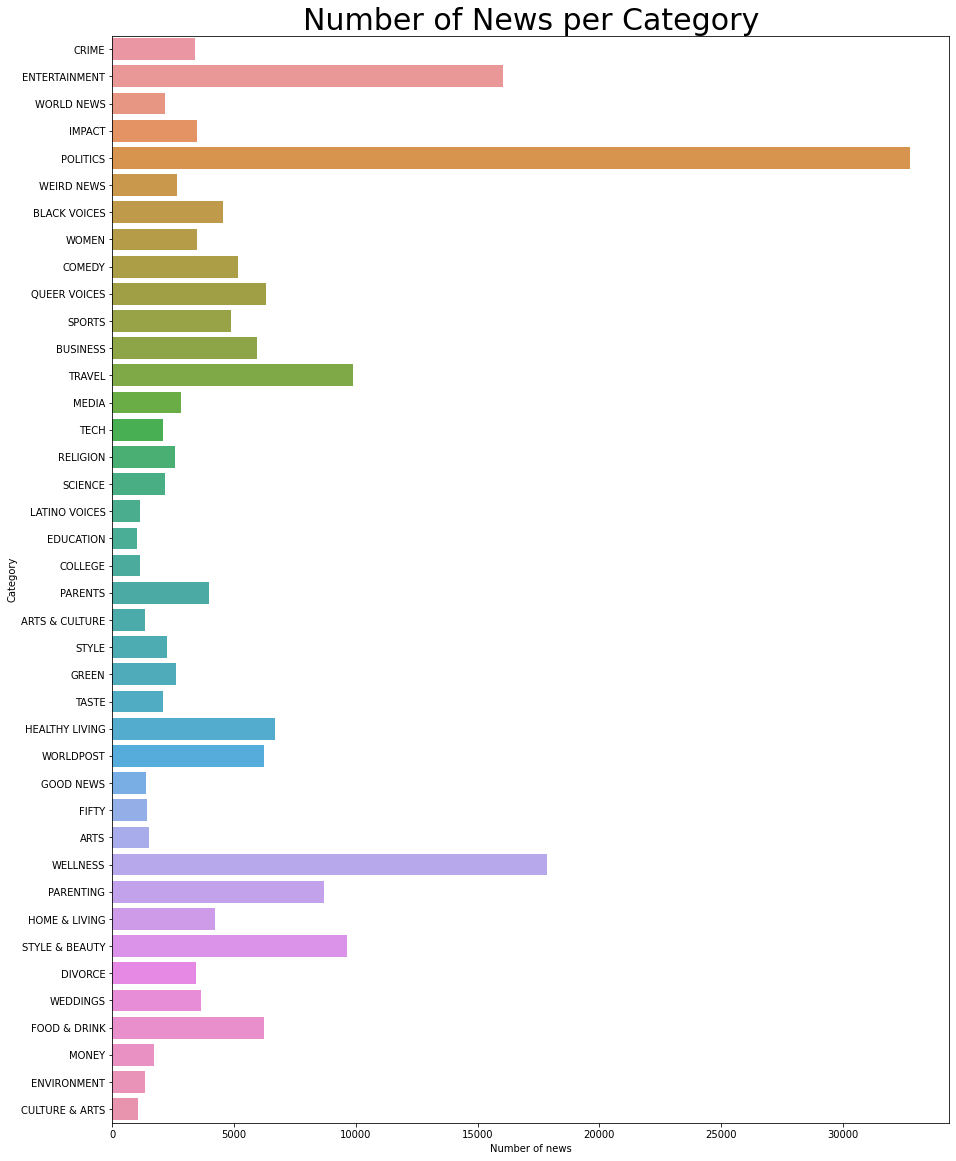

In [10]:
fig,ax = plt.subplots(figsize=(15,20))

ax = sns.countplot(y= "category", data=df);
plt.title("Number of News per Category", fontsize = 30)
#plt.xticks(rotation=50)
plt.ylabel("Category")
plt.xlabel("Number of news");


# 3. Cleaning Data

### 3.1 Dropping extra columns

Since we only need, Headline and Short description, let's drop the other columns to clean the visualization

In [11]:
df_clean = df.drop(["authors","link","date"], axis=1)
df_clean.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


### 3.2 Fusing 'headline' and 'short_description'

It is easier for the machine to interpreto the headline and shor description as the same. Therefore we are going to fuse them, we are going to fuse these columns

In [12]:
df_clean['text'] = df_clean['headline'] + " " + df_clean['short_description']
df_clean.drop(["headline","short_description"], axis=1, inplace = True)
df_clean.head()

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In this problem, we have 
1. Feature (X): text
2. Target (y): category

As in any classification problem, it is easier for the machine if we associate a numer to the category

In [13]:
df['category_id'] = df['category'].factorize()[0]
from io import StringIO
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df_clean['id'] = df['category_id']
df_clean.head()

,category,text,id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


### 3.3 Pre-Processing the text

In order to reduce the 'noisy' information from text to failitate the machine work we will
1. remove the punctuation from text (ex: .,:)
2. make lowercase because we assume that punctuation and letter case don’t influence the meaning of words.
3. remove stop words (ex. our, you, yourself, he, his, she,them etc. you can review the complete list on this [link](https://https://gist.github.com/sebleier/554280).
4. make lemmatization to words: lemmatization is a process of extracting a root word by considering the vocabulary. For example, “good”, “better”, or “best” is lemmatized (changed) into “good”. Is like making synonims

In [14]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Function to clean, tokenize, remove stop word, and not alphanumeric from data

In [15]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)    
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [16]:
def Format_data(df): 
    # iterate over all the rows 
    for i in range(df.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        df.iat[i, 1]= clean_txt(df.iat[i, 1])


In [17]:
df_clean['text'] = df_clean['text'].apply(clean_txt)

In [18]:
df_clean.head()

,category,text,id
0,CRIME,mass shoot texas last week leave husband kill ...,0
1,ENTERTAINMENT,smith join diplo nicky jam world cup official ...,1
2,ENTERTAINMENT,hugh grant marry first age actor longtime girl...,1
3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,1
4,ENTERTAINMENT,julianna margulies use donald trump poop bag p...,1


We can calculate the lenght of each text

In [19]:
def len_text(text):
  if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
  else:
         return 0

In [20]:
df_clean['len'] = df_clean['text'].apply(len_text)
df_clean.head(2)

,category,text,id,len
0,CRIME,mass shoot texas last week leave husband kill ...,0,1.000000
1,ENTERTAINMENT,smith join diplo nicky jam world cup official ...,1,0.909091


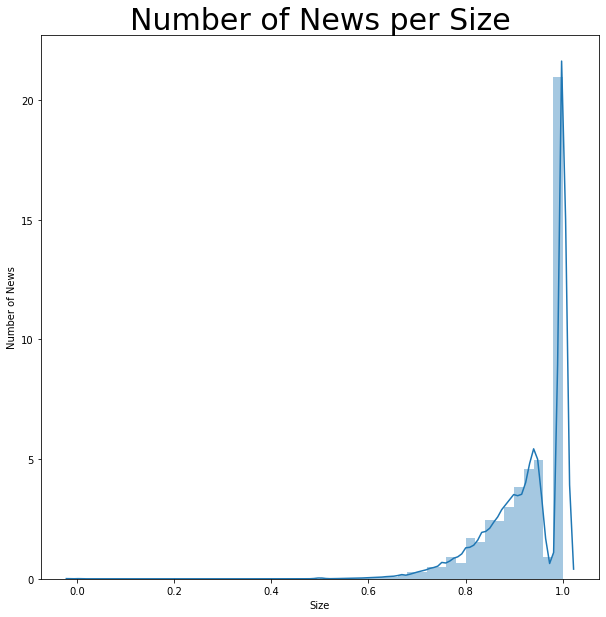

In [21]:
fig,ax = plt.subplots(figsize=(10,10))
x = df_clean['len']
ax = sns.distplot(x);
plt.title("Number of News per Size", fontsize = 30)
#plt.xticks(rotation=50)
plt.ylabel("Number of News")
plt.xlabel("Size");


In [22]:
df_clean[df_clean['len']<0.1].count()

category    23
text        23
id          23
len         23
dtype: int64

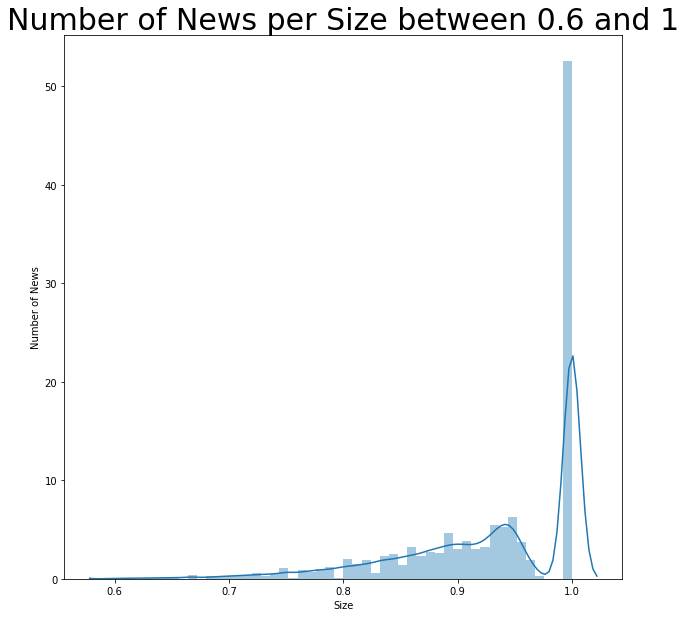

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
x2 = df_clean[df_clean['len'] >= 0.6]['len']
ax = sns.distplot(x2);
plt.title("Number of News per Size between 0.6 and 1", fontsize = 30)
#plt.xticks(rotation=50)
plt.ylabel("Number of News")
plt.xlabel("Size");

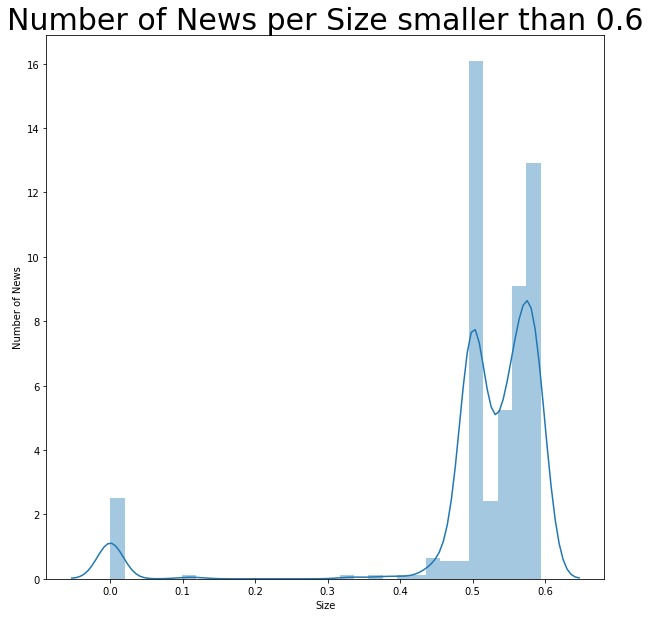

In [24]:
fig,ax = plt.subplots(figsize=(10,10))
x3 = df_clean[df_clean['len'] < 0.6]['len']
ax = sns.distplot(x3);
plt.title("Number of News per Size smaller than 0.6", fontsize = 30)
#plt.xticks(rotation=50)
plt.ylabel("Number of News")
plt.xlabel("Size");

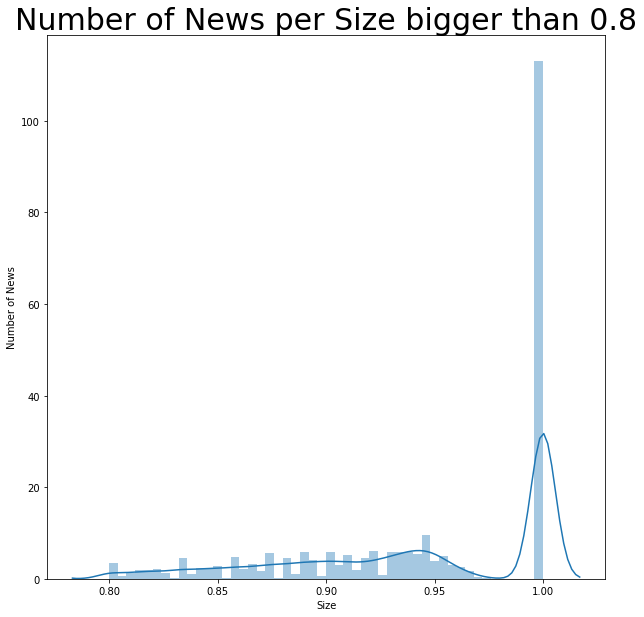

In [25]:
fig,ax = plt.subplots(figsize=(10,10))
x3 = df_clean[df_clean['len'] >= 0.8]['len']
ax = sns.distplot(x3);
plt.title("Number of News per Size bigger than 0.8", fontsize = 30)
#plt.xticks(rotation=50)
plt.ylabel("Number of News")
plt.xlabel("Size");

In [26]:
df_clean['len'].mean()

0.9292565270397036

In [27]:
df_clean['len'].std()

0.0817222433654937

#4. Prepare the data: text vectorization

The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.


In [28]:
X = df_clean['text']
y = df_clean['id']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state = 0)

In [30]:
X_train.shape, X_test.shape

((180767,), (20086,))

In [31]:
X = X_test
y = y_test

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X).toarray()
labels = y
features.shape

(20086, 9807)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [34]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#the Classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

#features = tfidf.fit_transform(X).toarray()
#labels = y
#features.shape

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    #KNeighborsClassifier(n_neighbors=5)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

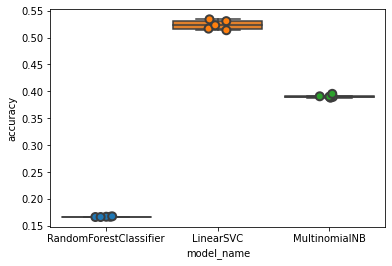

In [36]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.523449
MultinomialNB             0.390770
RandomForestClassifier    0.166733
Name: accuracy, dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model.fit(features, labels)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [ ]:
print(clf.predict(count_vect.transform(["Looking For a New Watch? 50 Shows Starring Awesome Ladies You Can Stream Right Now"])))

In [ ]:
print(clf.predict(count_vect.transform(["Miley Cyrus shaves Cody Simpson's head, plus more news"])))